In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
Book = pd.read_excel("Bookshop.xlsx",sheet_name='Book')
Author = pd.read_excel("Bookshop.xlsx",sheet_name='Author')
Info = pd.read_excel("Bookshop.xlsx",sheet_name='Info')
Award = pd.read_excel("Bookshop.xlsx",sheet_name='Award')
Checkouts = pd.read_excel("Bookshop.xlsx",sheet_name='Checkouts')
Edition = pd.read_excel("Bookshop.xlsx",sheet_name='Edition')
Publisher = pd.read_excel("Bookshop.xlsx",sheet_name='Publisher')
Ratings = pd.read_excel("Bookshop.xlsx",sheet_name='Ratings')
Series = pd.read_excel("Bookshop.xlsx",sheet_name='Series')
Sales_Q1 = pd.read_excel("Bookshop.xlsx",sheet_name='Sales Q1')
Sales_Q2 = pd.read_excel("Bookshop.xlsx",sheet_name='Sales Q2')
Sales_Q3 = pd.read_excel("Bookshop.xlsx",sheet_name='Sales Q3')
Sales_Q4 = pd.read_excel("Bookshop.xlsx",sheet_name='Sales Q4')

In [4]:
merge1 = pd.merge(Book,Author, on="AuthID", how="inner")
merge1['Author Name']=merge1['First Name']+' '+merge1['Last Name']
merge1.drop(columns=['First Name','Last Name','Birthday','Hrs Writing per Day'],inplace=True)
merge1.head()

,BookID,Title,AuthID,Country of Residence,Author Name
0,BB194,Ballinby Boys,AM329,New Zealand,Arthur McCrumb
1,NC652,Nothing But Capers,AS443,Norway,Abraham Stackhouse
2,AD222,Alanna Saves the Day,BH149,United States,Bernard Hopf
3,PA169,Post Alley,BM856,Brazil,Burton Malamud
4,TC188,Thatchwork Cottage,BM856,Brazil,Burton Malamud


In [5]:
Info["BookID"] = Info["BookID1"] + Info["BookID2"].astype(str)
Info.drop(columns=["BookID1", "BookID2"], inplace=True, errors='ignore')

In [6]:
merge2 = merge1.merge(Info,on="BookID", how="inner")
merge2.drop(columns=['Volume Number','Staff Comment','SeriesID'],inplace=True)
merge2.head()

,BookID,Title,AuthID,Country of Residence,Author Name,Genre
0,BB194,Ballinby Boys,AM329,New Zealand,Arthur McCrumb,SciFi/Fantasy
1,NC652,Nothing But Capers,AS443,Norway,Abraham Stackhouse,Nonfiction
2,AD222,Alanna Saves the Day,BH149,United States,Bernard Hopf,Childrens
3,PA169,Post Alley,BM856,Brazil,Burton Malamud,Fiction
4,TC188,Thatchwork Cottage,BM856,Brazil,Burton Malamud,Fiction


In [7]:
merge3 = merge2.merge(Award,on="Title",how="outer")
merge3.drop(columns=['Award Name','Year Won'],inplace=True)
merge3.drop_duplicates(inplace=True)
merge3.reset_index(drop=True, inplace=True)
merge3.head()

,BookID,Title,AuthID,Country of Residence,Author Name,Genre
0,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult
1,NR695,9803 North Millworks Road,CS190,United States,Carolyn Segal,Mystery
2,AM124,A Horrible Human with the Habits of a Monster,KD840,South Africa,Kenneth Douglas,Fiction
3,AK974,Adventures of Kaya,WH901,Brazil,Ward Haigh,Young Adult
4,AD222,Alanna Saves the Day,BH149,United States,Bernard Hopf,Childrens


In [8]:
merge4=merge3.merge(Checkouts,on="BookID",how="inner")
merge4.head()

,BookID,Title,AuthID,Country of Residence,Author Name,Genre,CheckoutMonth,Number of Checkouts
0,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,8,5
1,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,3,4
2,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,4,4
3,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,5,4
4,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,6,4


In [9]:
merge5=pd.merge(merge4,Edition,on='BookID',how='inner')
merge5.drop(columns=['Print Run Size (k)','Pages','Format'],inplace=True)
merge5.drop_duplicates(inplace=True)
merge5.reset_index(drop=True,inplace=True)
merge5.head()

,BookID,Title,AuthID,Country of Residence,Author Name,Genre,CheckoutMonth,Number of Checkouts,ISBN,PubID,Publication Date,Price
0,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,8,5,989-28-3705-763-7,CHP,2191-11-15,22.99
1,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,8,5,989-28-3705-205-2,CHP,2192-09-18,11.99
2,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,3,4,989-28-3705-763-7,CHP,2191-11-15,22.99
3,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,3,4,989-28-3705-205-2,CHP,2192-09-18,11.99
4,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,4,4,989-28-3705-763-7,CHP,2191-11-15,22.99


In [10]:
merge6=pd.merge(merge5,Publisher,on='PubID',how='inner')
merge6.drop(columns=['Year Established','Marketing Spend'],inplace=True)
merge6.head()

,BookID,Title,AuthID,Country of Residence,Author Name,Genre,CheckoutMonth,Number of Checkouts,ISBN,PubID,Publication Date,Price,Publishing House,City,State,Country
0,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,8,5,989-28-3705-763-7,CHP,2191-11-15,22.99,Cedar House Publishers,Friday Harbor,Washington,USA
1,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,8,5,989-28-3705-205-2,CHP,2192-09-18,11.99,Cedar House Publishers,Friday Harbor,Washington,USA
2,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,3,4,989-28-3705-763-7,CHP,2191-11-15,22.99,Cedar House Publishers,Friday Harbor,Washington,USA
3,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,3,4,989-28-3705-205-2,CHP,2192-09-18,11.99,Cedar House Publishers,Friday Harbor,Washington,USA
4,MM424,(im)Mortality,CW626,United Kingdom,Clifford Wolitzer,Young Adult,4,4,989-28-3705-763-7,CHP,2191-11-15,22.99,Cedar House Publishers,Friday Harbor,Washington,USA


In [11]:
#merge7=pd.concat([merge6,Ratings])
#merge7.fillna(0,inplace=True)
#merge7

In [12]:
Sales1 = pd.concat([Sales_Q1,Sales_Q2])
Sales1.drop(columns='Discount',inplace=True)
Sales1.head()

,Sale Date,ISBN,ItemID,OrderID
0,2193-01-02,989-28-3705-007-2,107020-91-8011,107020-1
1,2193-01-02,989-28-79-11297-4,107020-9-3293,107020-10
2,2193-01-02,989-28-79-11297-4,107020-91-4622,107020-11
3,2193-01-02,989-28-79-18127-7,107020-38-4663,107020-12
4,2193-01-02,989-28-79-82197-5,107020-1-1485,107020-13


In [13]:
Sales2 = pd.concat([Sales_Q3,Sales_Q4])
Sales2.drop(columns='Discount',inplace=True)
Sales2.head()

,Sale Date,ISBN,ItemID,OrderID
0,2193-07-01,989-28-79-68089-3,107200-1-6303,107178-18776
1,2193-07-01,989-28-3705-987-7,107200-74-9148,107200-18626
2,2193-07-01,989-28-3705-987-7,107200-7-214,107200-18627
3,2193-07-01,989-28-3705-966-2,107200-53-5192,107200-18628
4,2193-07-01,989-28-3705-987-7,107200-21-2003,107200-18629


In [14]:
merged_data = pd.concat([Sales1, Sales2])
merged_data.head()

,Sale Date,ISBN,ItemID,OrderID
0,2193-01-02,989-28-3705-007-2,107020-91-8011,107020-1
1,2193-01-02,989-28-79-11297-4,107020-9-3293,107020-10
2,2193-01-02,989-28-79-11297-4,107020-91-4622,107020-11
3,2193-01-02,989-28-79-18127-7,107020-38-4663,107020-12
4,2193-01-02,989-28-79-82197-5,107020-1-1485,107020-13


In [15]:
Final = pd.concat([merged_data,merge6],axis=0)
Final.fillna(0,inplace=True)
Final.head()

,Sale Date,ISBN,ItemID,OrderID,BookID,Title,AuthID,Country of Residence,Author Name,Genre,CheckoutMonth,Number of Checkouts,PubID,Publication Date,Price,Publishing House,City,State,Country
0,2193-01-02 00:00:00,989-28-3705-007-2,107020-91-8011,107020-1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0
1,2193-01-02 00:00:00,989-28-79-11297-4,107020-9-3293,107020-10,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0
2,2193-01-02 00:00:00,989-28-79-11297-4,107020-91-4622,107020-11,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0
3,2193-01-02 00:00:00,989-28-79-18127-7,107020-38-4663,107020-12,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0
4,2193-01-02 00:00:00,989-28-79-82197-5,107020-1-1485,107020-13,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0


In [16]:
Final.isnull().sum()

Sale Date               0
ISBN                    0
ItemID                  0
OrderID                 0
BookID                  0
Title                   0
AuthID                  0
Country of Residence    0
Author Name             0
Genre                   0
CheckoutMonth           0
Number of Checkouts     0
PubID                   0
Publication Date        0
Price                   0
Publishing House        0
City                    0
State                   0
Country                 0
dtype: int64

In [17]:
Final1 = pd.concat([Final,Ratings],axis=0)
Final1.fillna(0,inplace=True)
Final1.head()

,Sale Date,ISBN,ItemID,OrderID,BookID,Title,AuthID,Country of Residence,Author Name,Genre,...,PubID,Publication Date,Price,Publishing House,City,State,Country,Rating,ReviewerID,ReviewID
0,2193-01-02 00:00:00,989-28-3705-007-2,107020-91-8011,107020-1,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0.0,0.0,0.0
1,2193-01-02 00:00:00,989-28-79-11297-4,107020-9-3293,107020-10,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0.0,0.0,0.0
2,2193-01-02 00:00:00,989-28-79-11297-4,107020-91-4622,107020-11,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0.0,0.0,0.0
3,2193-01-02 00:00:00,989-28-79-18127-7,107020-38-4663,107020-12,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0.0,0.0,0.0
4,2193-01-02 00:00:00,989-28-79-82197-5,107020-1-1485,107020-13,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0.0,0.0,0.0


In [18]:
Final1.describe()

,CheckoutMonth,Number of Checkouts,Price,Rating,ReviewerID,ReviewID
count,107777.000000,107777.000000,107777.000000,107777.000000,107777.000000,1.077770e+05
mean,0.065923,0.225048,0.168043,1.923342,12542.879575,1.251520e+06
std,0.737013,3.495183,1.837104,2.151251,17003.840415,1.698051e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,-8.289000e+03
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,0.000000,4.000000,24969.000000,2.491647e+06
max,12.000000,130.000000,48.000000,5.000000,53424.000000,5.338737e+06


In [19]:
Final1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107777 entries, 0 to 50329
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Sale Date             107777 non-null  object 
 1   ISBN                  107777 non-null  object 
 2   ItemID                107777 non-null  object 
 3   OrderID               107777 non-null  object 
 4   BookID                107777 non-null  object 
 5   Title                 107777 non-null  object 
 6   AuthID                107777 non-null  object 
 7   Country of Residence  107777 non-null  object 
 8   Author Name           107777 non-null  object 
 9   Genre                 107777 non-null  object 
 10  CheckoutMonth         107777 non-null  float64
 11  Number of Checkouts   107777 non-null  float64
 12  PubID                 107777 non-null  object 
 13  Publication Date      107777 non-null  object 
 14  Price                 107777 non-null  float64
 15  Publis

In [20]:
# numeric col
num_col = [i for i in Final1.columns if Final1[i].dtype != 'O']
num_col

['CheckoutMonth',
 'Number of Checkouts',
 'Price',
 'Rating',
 'ReviewerID',
 'ReviewID']

In [21]:
# categrical col
cat_col = [i for i in Final1.columns if Final1[i].dtype == 'O']
cat_col

['Sale Date',
 'ISBN',
 'ItemID',
 'OrderID',
 'BookID',
 'Title',
 'AuthID',
 'Country of Residence',
 'Author Name',
 'Genre',
 'PubID',
 'Publication Date',
 'Publishing House',
 'City',
 'State',
 'Country']

In [22]:
Final1.columns

Index(['Sale Date', 'ISBN', 'ItemID', 'OrderID', 'BookID', 'Title', 'AuthID',
       'Country of Residence', 'Author Name', 'Genre', 'CheckoutMonth',
       'Number of Checkouts', 'PubID', 'Publication Date', 'Price',
       'Publishing House', 'City', 'State', 'Country', 'Rating', 'ReviewerID',
       'ReviewID'],
      dtype='object')

### Visuvalization

Text(0.5, 1.0, 'Book Title')

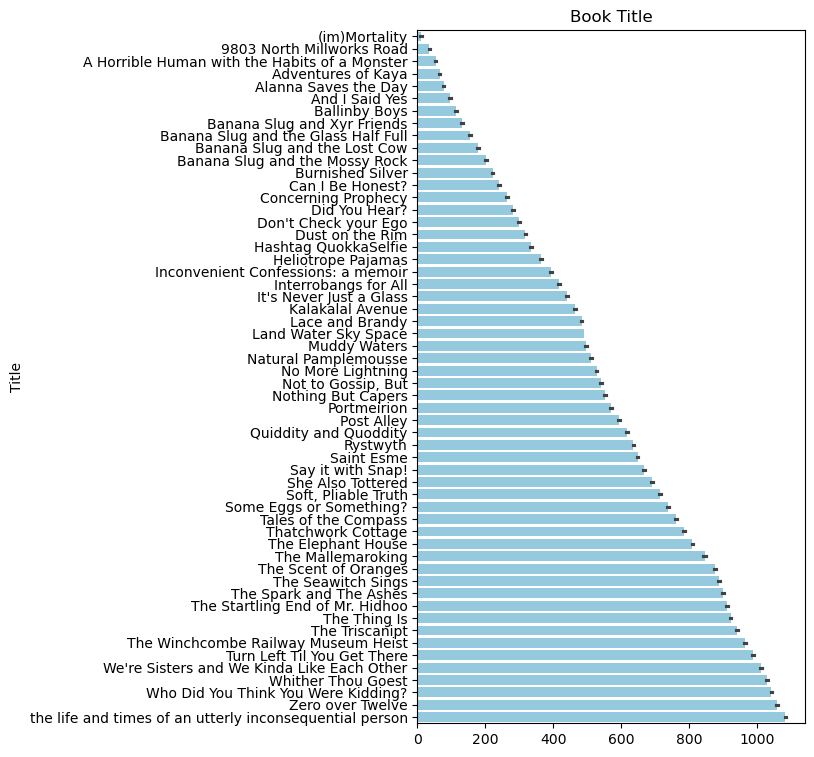

In [24]:
plt.figure(figsize=(5,9))
sns.barplot(merge6['Title'],color='skyblue')
plt.title('Book Title')

Text(0.5, 1.0, 'Ratings')

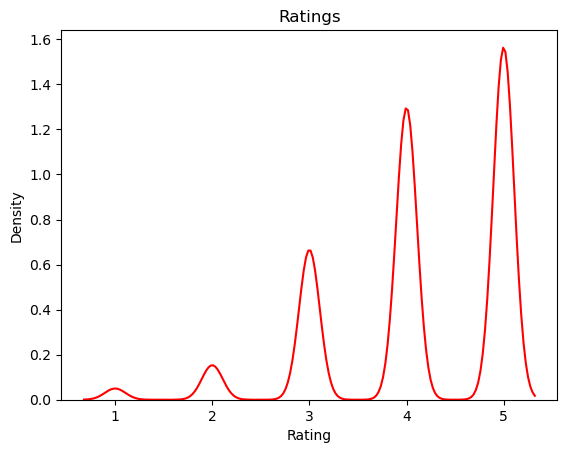

In [25]:
sns.kdeplot(Ratings['Rating'],color='red')
plt.title('Ratings')

Text(0.5, 1.0, 'Title vs Ratings')

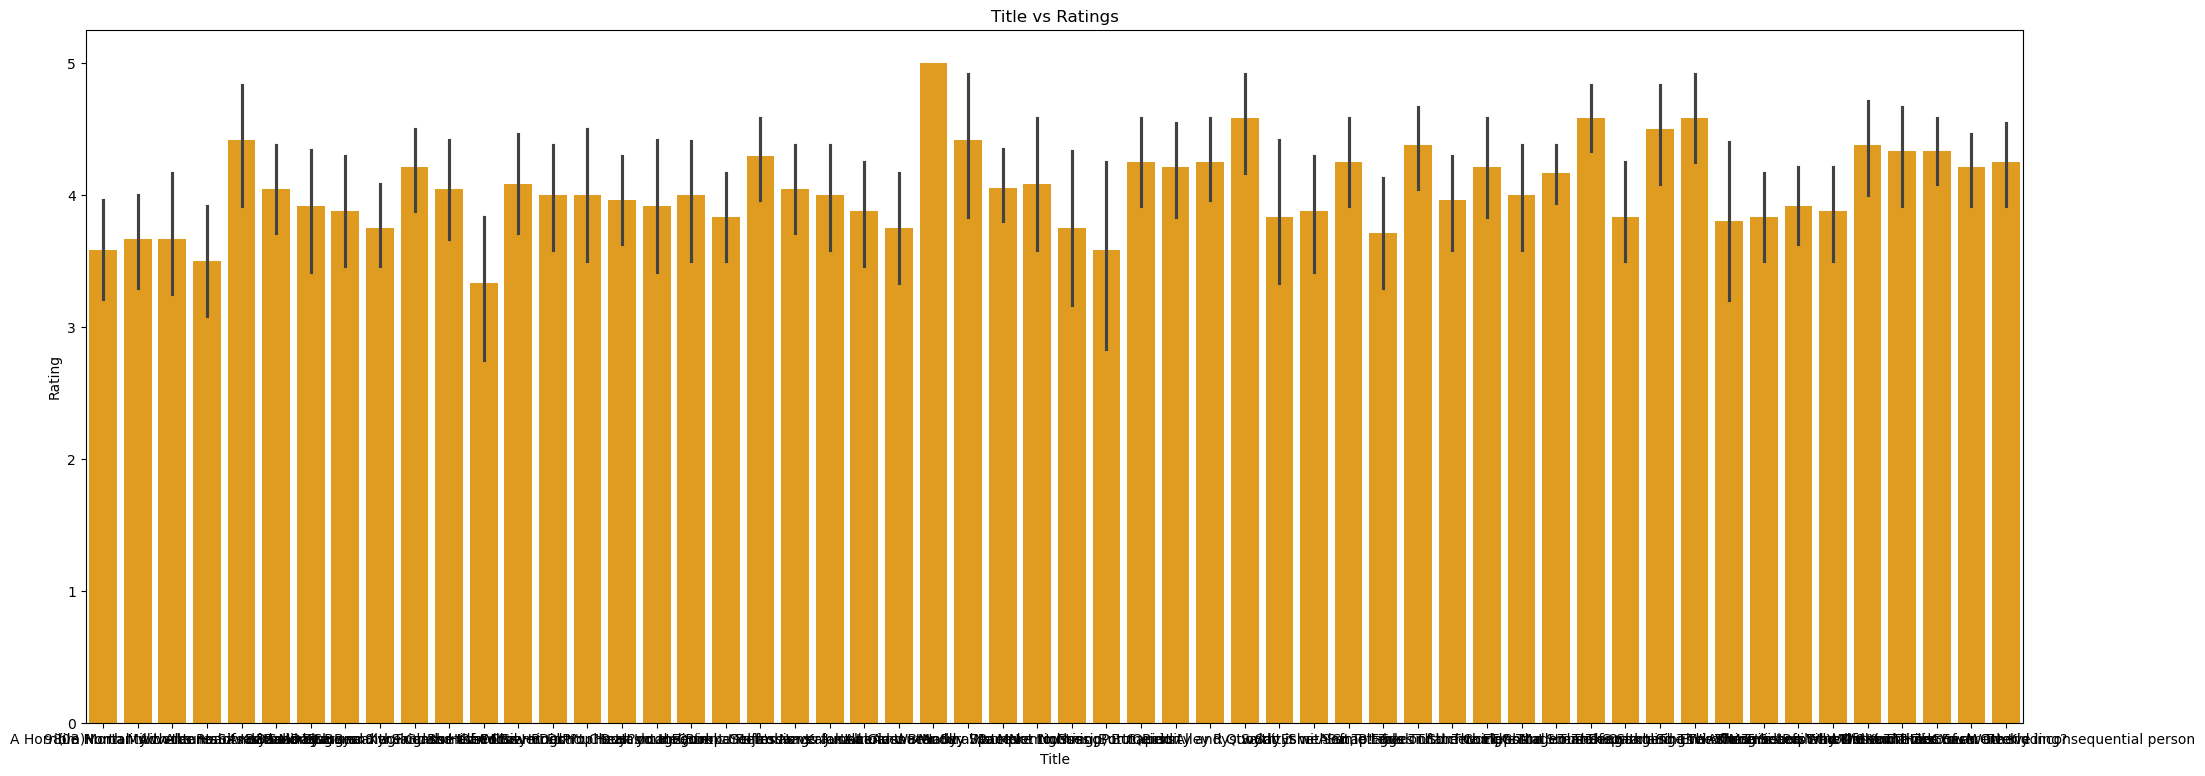

In [26]:
plt.figure(figsize=(25,9))
sns.barplot(x=merge6['Title'],y=Ratings['Rating'],color='orange')
plt.title('Title vs Ratings')

Text(0.5, 1.0, 'AuthID vs Ratings')

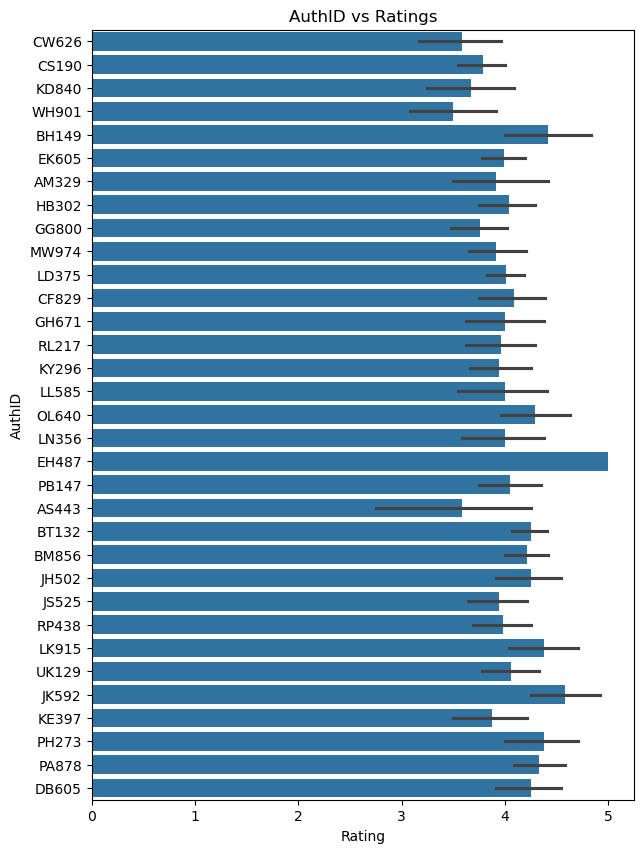

In [27]:
plt.figure(figsize=(7,10))
sns.barplot(y=merge6['AuthID'],x=Ratings['Rating'])
plt.title('AuthID vs Ratings')

In [28]:
corr = Final1[num_col].corr()
corr

,CheckoutMonth,Number of Checkouts,Price,Rating,ReviewerID,ReviewID
CheckoutMonth,1.000000,0.537077,0.793577,-0.079971,-0.065981,-0.065926
Number of Checkouts,0.537077,1.000000,0.519448,-0.057567,-0.047496,-0.047457
Price,0.793577,0.519448,1.000000,-0.081781,-0.067474,-0.067418
Rating,-0.079971,-0.057567,-0.081781,1.000000,0.770471,0.769865
ReviewerID,-0.065981,-0.047496,-0.067474,0.770471,1.000000,0.999999
ReviewID,-0.065926,-0.047457,-0.067418,0.769865,0.999999,1.000000


<Axes: >

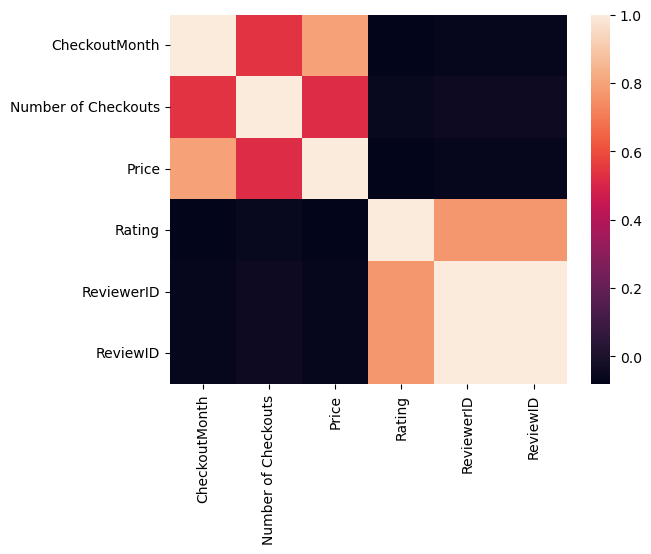

In [29]:
sns.heatmap(corr)

Text(0.5, 1.0, 'Numerical Column Scatter plot')

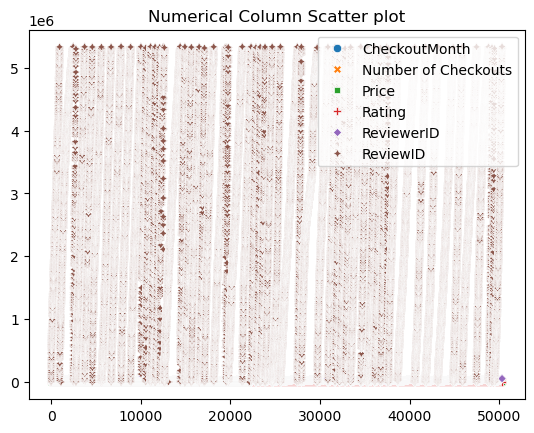

In [30]:
sns.scatterplot(Final1)
plt.title('Numerical Column Scatter plot')

Text(0.5, 1.0, 'Numerical Column Pair plot')

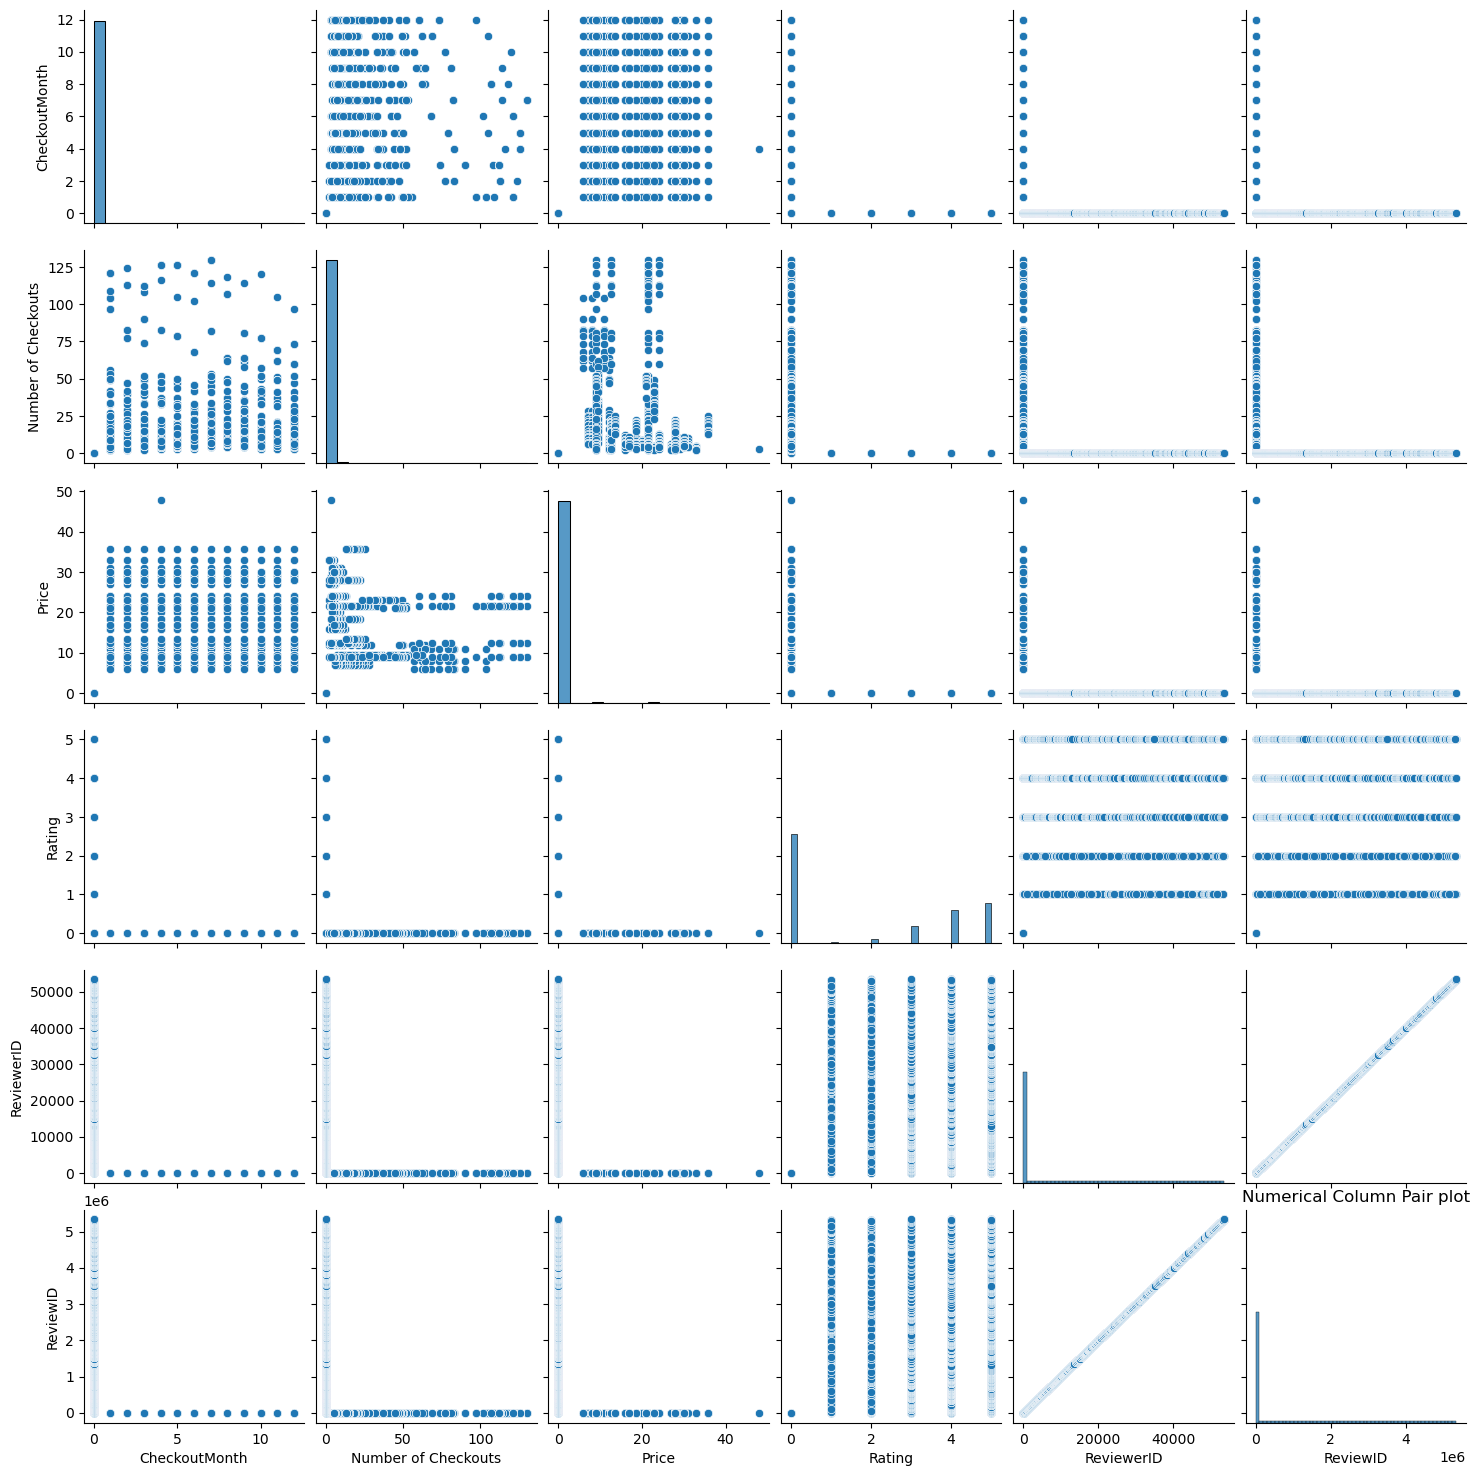

In [31]:
sns.pairplot(Final1)
plt.title('Numerical Column Pair plot')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,OneHotEncoder,LabelEncoder,RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
std=StandardScaler()

In [34]:
data1 = pd.DataFrame(std.fit_transform(Final1[num_col]))
data1

,0,1,2,3,4,5
0,-0.089447,-0.064388,-0.091472,-0.894061,-0.737653,-0.737037
1,-0.089447,-0.064388,-0.091472,-0.894061,-0.737653,-0.737037
2,-0.089447,-0.064388,-0.091472,-0.894061,-0.737653,-0.737037
3,-0.089447,-0.064388,-0.091472,-0.894061,-0.737653,-0.737037
4,-0.089447,-0.064388,-0.091472,-0.894061,-0.737653,-0.737037
...,...,...,...,...,...,...
107772,-0.089447,-0.064388,-0.091472,0.035634,2.386303,2.388995
107773,-0.089447,-0.064388,-0.091472,1.430178,2.387596,2.390640
107774,-0.089447,-0.064388,-0.091472,0.500482,2.389655,2.391652
107775,-0.089447,-0.064388,-0.091472,0.965330,2.400123,2.400444


In [35]:
ord = OrdinalEncoder()

In [36]:
data = Final1[cat_col].astype(str)

In [37]:
data2 = pd.DataFrame(ord.fit_transform(data))
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,8.0,52.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,49.0,49.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,49.0,51.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,56.0,24.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,88.0,2.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107772,0.0,0.0,0.0,0.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107773,0.0,0.0,0.0,0.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107774,0.0,0.0,0.0,0.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107775,0.0,0.0,0.0,0.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
freatures1 = pd.concat([data1,data2],axis=1,ignore_index=True)
old_name = range(0,6)
new_name = num_col
old_name1 = range(6,22)
new_name1 = cat_col
New_data = freatures1.rename(columns=dict(zip(old_name,new_name)))
new_data = New_data.rename(columns=dict(zip(old_name1,new_name1)))
new_data

,CheckoutMonth,Number of Checkouts,Price,Rating,ReviewerID,ReviewID,Sale Date,ISBN,ItemID,OrderID,...,AuthID,Country of Residence,Author Name,Genre,PubID,Publication Date,Publishing House,City,State,Country
0,-0.089447,-0.064388,-0.091472,-0.894061,-0.737653,-0.737037,1.0,8.0,52.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.089447,-0.064388,-0.091472,-0.894061,-0.737653,-0.737037,1.0,49.0,49.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.089447,-0.064388,-0.091472,-0.894061,-0.737653,-0.737037,1.0,49.0,51.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.089447,-0.064388,-0.091472,-0.894061,-0.737653,-0.737037,1.0,56.0,24.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.089447,-0.064388,-0.091472,-0.894061,-0.737653,-0.737037,1.0,88.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107772,-0.089447,-0.064388,-0.091472,0.035634,2.386303,2.388995,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107773,-0.089447,-0.064388,-0.091472,1.430178,2.387596,2.390640,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107774,-0.089447,-0.064388,-0.091472,0.500482,2.389655,2.391652,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107775,-0.089447,-0.064388,-0.091472,0.965330,2.400123,2.400444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
Km = KMeans(n_clusters=2)

In [40]:
cluster = Km.fit(new_data)

In [41]:
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
labels = Km.fit_predict(new_data)
labels

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
silhouette_score(new_data,cluster.labels_)

0.7654517124612862

In [44]:
Final1.columns

Index(['Sale Date', 'ISBN', 'ItemID', 'OrderID', 'BookID', 'Title', 'AuthID',
       'Country of Residence', 'Author Name', 'Genre', 'CheckoutMonth',
       'Number of Checkouts', 'PubID', 'Publication Date', 'Price',
       'Publishing House', 'City', 'State', 'Country', 'Rating', 'ReviewerID',
       'ReviewID'],
      dtype='object')

#### Recomendation system 

In [46]:
len(Final1.AuthID.unique())

34

In [47]:
len(Final1.Title.unique())

57

In [48]:
Final1.Rating.unique()

array([0., 5., 3., 4., 2., 1.])

In [49]:
Final1.groupby('Title')['Rating'].mean().sort_values(ascending=False)

Title
0                                                          1.94312
Not to Gossip, But                                         0.00000
Portmeirion                                                0.00000
Post Alley                                                 0.00000
Quiddity and Quoddity                                      0.00000
Rystwyth                                                   0.00000
Saint Esme                                                 0.00000
Say it with Snap!                                          0.00000
She Also Tottered                                          0.00000
Soft, Pliable Truth                                        0.00000
Some Eggs or Something?                                    0.00000
Tales of the Compass                                       0.00000
Thatchwork Cottage                                         0.00000
The Elephant House                                         0.00000
The Mallemaroking                                       

In [50]:
Final1.groupby('Title')['Rating'].count().sort_values(ascending=False)

Title
0                                                          106680
The Mallemaroking                                              48
Heliotrope Pajamas                                             36
Some Eggs or Something?                                        24
(im)Mortality                                                  24
Portmeirion                                                    24
Post Alley                                                     24
Quiddity and Quoddity                                          24
Say it with Snap!                                              24
She Also Tottered                                              24
Soft, Pliable Truth                                            24
Tales of the Compass                                           24
It's Never Just a Glass                                        24
Thatchwork Cottage                                             24
The Elephant House                                             24
The 

In [51]:
df = Final1.pivot_table(index='Title', columns='AuthID', values=['Genre', 'Price', 'Rating'],aggfunc='first')
df.head()

Genre                          \
AuthID                                            0 AM329 AS443 BH149 BM856   
Title                                                                         
0                                                 0   NaN   NaN   NaN   NaN   
(im)Mortality                                   NaN   NaN   NaN   NaN   NaN   
9803 North Millworks Road                       NaN   NaN   NaN   NaN   NaN   
A Horrible Human with the Habits of a Monster   NaN   NaN   NaN   NaN   NaN   
Adventures of Kaya                              NaN   NaN   NaN   NaN   NaN   

                                                                    \
AuthID                                        BT132 CF829    CS190   
Title                                                                
0                                               NaN   NaN      NaN   
(im)Mortality                                   NaN   NaN      NaN   
9803 North Millworks Road                       NaN   NaN  Mystery   
A Horrible Human with the Habits of a Monster   NaN   NaN      NaN   
Adventures of Kaya                              NaN   NaN      NaN   

                                                                  ... Rating  \
AuthID                                               CW626 DB605  ...  LN356   
Title                                                             ...          
0                                                      NaN   NaN  ...    NaN   
(im)Mortality                                  Young Adult   NaN  ...    NaN   
9803 North Millworks Road                              NaN   NaN  ...    NaN   
A Horrible Human with the Habits of a Monster          NaN   NaN  ...    NaN   
Adventures of Kaya                                     NaN   NaN  ...    NaN   

                                                                             \
AuthID                                        MW974 OL640 PA878 PB147 PH273   
Title                                                                         
0                                               NaN   NaN   NaN   NaN   NaN   
(im)Mortality                                   NaN   NaN   NaN   NaN   NaN   
9803 North Millworks Road                       NaN   NaN   NaN   NaN   NaN   
A Horrible Human with the Habits of a Monster   NaN   NaN   NaN   NaN   NaN   
Adventures of Kaya                              NaN   NaN   NaN   NaN   NaN   

                                                                       
AuthID                                        RL217 RP438 UK129 WH901  
Title                                                                  
0                                               NaN   NaN   NaN   NaN  
(im)Mortality                                   NaN   NaN   NaN   NaN  
9803 North Millworks Road                       NaN   NaN   NaN   NaN  
A Horrible Human with the Habits of a Monster   NaN   NaN   NaN   NaN  
Adventures of Kaya                              NaN   NaN   NaN   0.0  

[5 rows x 102 columns]

In [52]:
df.fillna(0,inplace=True)

In [53]:
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances 

In [54]:
df_numeric = df.select_dtypes(include=[float, int])
df_numeric.fillna(0,inplace=True)

In [55]:
cosine_sim = cosine_similarity(df_numeric)
cosine_sim

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [56]:
for i in merge6['Title']:
    print(i)

(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
(im)Mortality
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
9803 North Millworks Road
A Horrible Human with the Habits of a Mo

In [57]:
def recommended_book(book_name):
    if book_name in df.index:
       index =np.where(book_name==df.index)[0][0]
       similar_book= sorted(list(enumerate(cosine_sim[index])), key=lambda x: x[1], reverse=True)[1:6]
       print(f'Recommended Book of {book_name}')
       print('-'*12)
       for book in similar_book:
          print(df.index[book [0]])
    else:
       print('Book is not in the list')

In [58]:
recommended_book('Lace and Brandy')

Recommended Book of Lace and Brandy
------------
Did You Hear?
Lace and Brandy
Muddy Waters
Saint Esme
The Scent of Oranges


In [59]:
file = 'recommended_system_dlp'

In [60]:
import pickle

In [70]:
pickle.dump(open(file,'wb'))

SyntaxError: invalid syntax (3847602078.py, line 1)